In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Data Import and Preparation
data = pd.read_csv('/content/macro-data for collinearity - Sheet1.csv')

# Handle missing values (if any) - replace with mean for demonstration
data = data.fillna(data.mean())

# 2. Model Specification and Baseline Regression
# Define dependent and independent variables
independent_vars = ['Average Repo Rate (%)', 'Inflation Rate (Annual % Change)',
                     'Reserves/Broad Money (Unit)', 'Unemployment Rate (%)', 'Year']  # Include Year
dependent_var = 'Real GDP growth (Annual percent change)'

X = data[independent_vars]
y = data[dependent_var]

# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results summary
print("Baseline OLS Regression Results:")
print(results.summary())

# 3. Multicollinearity Diagnostics
# Calculate the correlation matrix
correlation_matrix = X.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Calculate VIFs
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)


# 4. Addressing Multicollinearity (Example: Ridge Regression)
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose an alpha value (regularization strength) - you'll need to tune this
alpha = 1.0

# Fit Ridge Regression
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

# Print Ridge Regression coefficients
print("\nRidge Regression Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {ridge_model.coef_[i]:.4f}")

# Evaluate Ridge Regression (example: R-squared on test set)
r_squared = ridge_model.score(X_test, y_test)
print(f"\nRidge Regression R-squared (Test Set): {r_squared:.4f}")

# 5. Parameter Interpretation (Example - focusing on Ridge)
# The Ridge coefficients represent the change in the dependent variable
# for a one standard deviation change in the independent variable,
# holding other variables constant.
print("\nInterpretation of Ridge Coefficients:")
print("Note: Coefficients are for standardized variables.")
print("Example: A one standard deviation increase in 'Inflation Rate' is associated with a change of {:.4f} in 'Real GDP growth', holding other variables constant.".format(ridge_model.coef_[2]))


# Further analysis would involve comparing OLS and Ridge results, tuning alpha, etc.


Baseline OLS Regression Results:
                                       OLS Regression Results                                      
Dep. Variable:     Real GDP growth (Annual percent change)   R-squared:                       0.049
Model:                                                 OLS   Adj. R-squared:                 -0.231
Method:                                      Least Squares   F-statistic:                    0.1744
Date:                                     Mon, 31 Mar 2025   Prob (F-statistic):              0.969
Time:                                             14:12:13   Log-Likelihood:                -57.967
No. Observations:                                       23   AIC:                             127.9
Df Residuals:                                           17   BIC:                             134.7
Df Model:                                                5                                         
Covariance Type:                                 nonrobust         

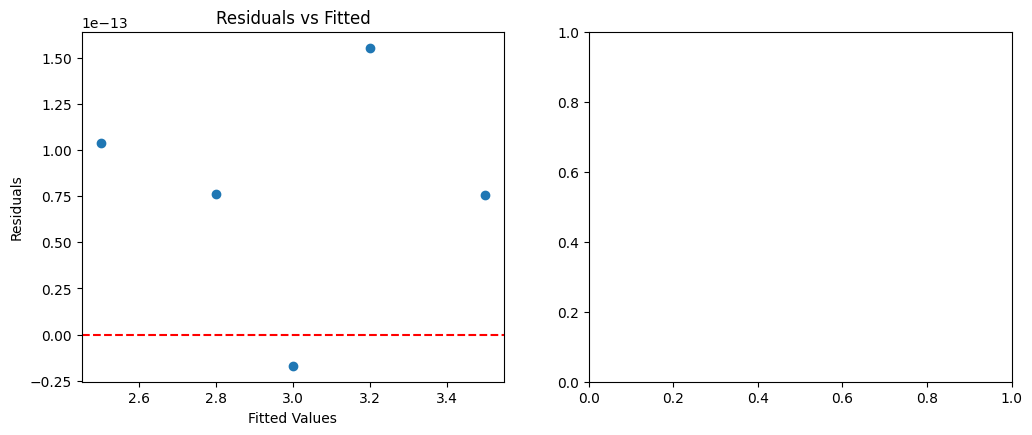

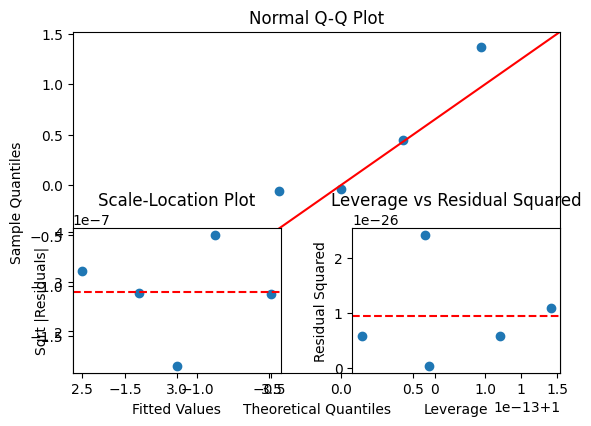

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual dataset)
data = {
    'Average Repo Rate (%)': [2.5, 3.0, 2.8, 3.5, 3.2],
    'Inflation Rate (%)': [1.5, 1.8, 1.7, 2.0, 1.9],
    'Reserves/Broad Money': [1500, 1600, 1550, 1650, 1700],
    'Unemployment Rate (%)': [5.0, 4.8, 5.2, 4.9, 5.1],
    'Year': [2018, 2019, 2020, 2021, 2022],
    'GDP Growth': [3.0, 2.5, 2.8, 3.5, 3.2]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define dependent and independent variables
X = df[['Average Repo Rate (%)', 'Inflation Rate (%)', 'Reserves/Broad Money', 'Unemployment Rate (%)', 'Year']]
y = df['GDP Growth']

# Fit OLS model
X = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(y, X).fit()

# Get residuals and fitted values
residuals = model.resid
fitted = model.fittedvalues

# Create diagnostic plots
plt.figure(figsize=(12, 10))

# Residuals vs Fitted
plt.subplot(2, 2, 1)
plt.scatter(fitted, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Normal Q-Q Plot
plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')

# Scale-Location Plot
plt.subplot(2, 2, 3)
sqrt_residuals = np.sqrt(np.abs(residuals))
plt.scatter(fitted, sqrt_residuals)
plt.axhline(np.mean(sqrt_residuals), linestyle='--', color='red')
plt.title('Scale-Location Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt |Residuals|')

# Leverage vs Residual Squared Plot
leverage = model.get_influence().hat_matrix_diag
residual_squared = residuals ** 2
plt.subplot(2, 2, 4)
plt.scatter(leverage, residual_squared)
plt.axhline(y=np.mean(residual_squared), linestyle='--', color='red')
plt.title('Leverage vs Residual Squared')
plt.xlabel('Leverage')
plt.ylabel('Residual Squared')

plt.tight_layout()
plt.show()
